In [270]:
import numpy as np               #array processing
import pandas as pd              #data manipulation
import re                        #regular expression for text cleaning
import random

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [271]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [272]:
data.shape

(23486, 11)

In [273]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [274]:
# drop observations with missing data
data.dropna(axis=0,inplace=True)

In [275]:
data.shape

(19662, 11)

In [276]:
# define a dictionary of all possible contractions and their expanded forms
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [277]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [278]:
def text_cleaner(text):
    newString = text.lower()
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split()])
    newString = re.sub(r"’s\b","",newString)
    newString = re.sub("[^a-zA-Z.,]", " ", newString)
    #tokens = [w for w in newString.split() if  not w in  stop_words]
    # remove terms with length = 1
    long_tokens=[]
    
    for i in newString.split():
        if(len(i) > 1):
            long_tokens.append(i)
    
    # return preprocessed tweets
    return " ".join(long_tokens)

In [279]:
# preprocess review text
cleaned_text = []
reviews=np.array(data['Review Text'])

for i in range(len(reviews)):
    cleaned_text.append(text_cleaner(reviews[i]))
    
    
# preprocess titles
cleaned_summary = []
summary=np.array(data['Title'])

for i in range(len(summary)):
    cleaned_summary.append(text_cleaner(summary[i]))
    
# create a dataframe
df=pd.DataFrame({'text':cleaned_text,'summary':cleaned_summary,'reviews':reviews})

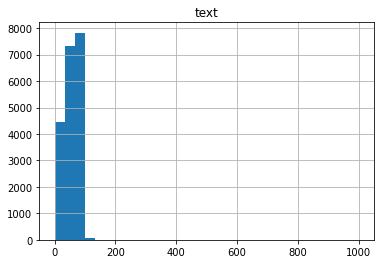

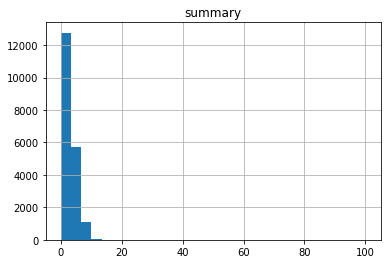

In [280]:
text_word_count = []
summary_word_count=[]

for i in df['text']:
      text_word_count.append(len(i.split()))
        
for i in df['summary']:
      summary_word_count.append(len(i.split()))
        
text_length_df = pd.DataFrame({'text':text_word_count})
text_length_df.hist(bins = 30,range=(0,1000))

summary_length_df = pd.DataFrame({'summary':summary_word_count})
summary_length_df.hist(bins = 30,range=(0,100))

plt.show()

In [281]:
# maximum length for text (user reviews)
max_text_len = 50

# maximum length for summaries (titles)
max_summary_len = 7

In [282]:
df['summary'] = df['summary'].apply(lambda x : 'start '+ x + ' end')

In [283]:
df.shape

(19662, 3)

In [284]:
from sklearn.model_selection import train_test_split

#split the cleaned data
x_tr, x_val, y_tr, y_val = train_test_split( df['text'],df['summary'],test_size = 0.1, random_state=0,shuffle=True)

#split the uncleaned data into same ratio with same random state
text_tr, text_val, y_tr, y_val = train_test_split( df['reviews'],df['summary'],test_size = 0.1, random_state=0,shuffle=True)

In [285]:
x_tr.shape

(17695,)

In [286]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer(num_words=5000) 
x_tokenizer.fit_on_texts(list(x_tr))

In [287]:
#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr   =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val  =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary
x_voc   =  x_tokenizer.num_words + 1

In [288]:
y_tokenizer = Tokenizer(num_words = 3000)   
y_tokenizer.fit_on_texts(list(y_tr))

In [289]:
summary_val = np.array(y_val)
text_val = np.array(text_val)

In [290]:
# Convert word sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

In [291]:
# eliminate the sequences from training data
index=[]
for i in range(len(y_tr_seq)):
    if(len(y_tr_seq[i])<=3):
        index.append(i)
        
y_tr_seq = np.delete(y_tr_seq,index, axis=0)
x_tr = np.delete(x_tr,index, axis=0)

# eliminate the sequences from test data
index = []
for i in range(len(y_val_seq)):
    if(len(y_val_seq[i])<=3):
        index.append(i)
        
y_val_seq = np.delete(y_val_seq,index, axis=0)
x_val = np.delete(x_val,index, axis=0)
text_val = np.delete(text_val,index,axis=0)
summary_val = np.delete(summary_val,index,axis=0)

In [292]:
#padding zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc = y_tokenizer.num_words +1

In [293]:
import keras
from keras.layers import Input, LSTM, Embedding, Dense, concatenate, TimeDistributed, Add, dot, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# No. of hidden nodes
latent_dim = 300
# Dimension of embeddings
embedding_dim=100

## Encoder-Decoder Structure for model training

#Encoder 
encoder_inputs=Input(shape=(max_text_len,))
encoder_embedding = Embedding(x_voc,embedding_dim, trainable=True, mask_zero=True)(encoder_inputs)

encoder_lstm = LSTM(latent_dim,return_sequences=True,return_state=True,go_backwards=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

#Decoder
decoder_inputs=Input(shape=(None,))
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True,mask_zero=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim,return_sequences=True,return_state=True)
decoder_outputs, dec_state_h, dec_state_c = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Dense layer
dense_layer = TimeDistributed(Dense(latent_dim, activation="tanh"))
dense_outputs=dense_layer(decoder_outputs) 

#Output layer
output_layer = TimeDistributed(Dense(y_voc, activation="softmax"))
decoder_outputs=output_layer(dense_outputs)

model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
input_35 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 50, 100)      500100      input_34[0][0]                   
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, None, 100)    300100      input_35[0][0]                   
___________________________________________________________________________________________

In [294]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [295]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2, min_delta=0.0001) 
mc = ModelCheckpoint('best_model_copy_5.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [296]:
x_tr.shape

(15755, 50)

In [297]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50, callbacks=[es,mc], batch_size=32, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 15755 samples, validate on 1715 samples
Epoch 1/50
15755/15755 [==============================] - 510s 32ms/step - loss: 3.3168 - val_loss: 2.9930

Epoch 00001: val_loss improved from inf to 2.99300, saving model to best_model_copy_5.hdf5
Epoch 2/50
15755/15755 [==============================] - 605s 38ms/step - loss: 2.9534 - val_loss: 2.7884

Epoch 00002: val_loss improved from 2.99300 to 2.78836, saving model to best_model_copy_5.hdf5
Epoch 3/50
15755/15755 [==============================] - 610s 39ms/step - loss: 2.8053 - val_loss: 2.7123

Epoch 00003: val_loss improved from 2.78836 to 2.71234, saving model to best_model_copy_5.hdf5
Epoch 4/50
15755/15755 [==============================] - 619s 39ms/step - loss: 2.7081 - val_loss: 2.6778

Epoch 00004: val_loss improved from 2.71234 to 2.67778, saving model to best_model_copy_5.hdf5
Epoch 5/50
15755/15755 [==============================] - 619s 39ms/step - loss: 2.6337 - val_loss: 2.6540

Epoch 00005: val_loss improved from

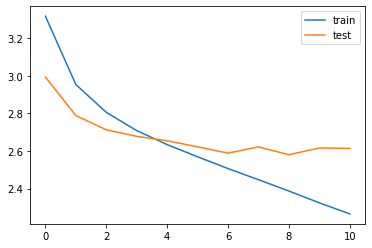

In [298]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [299]:
reverse_target_word_index=dict((v, k) for k, v in y_tokenizer.word_index.items())
reverse_source_word_index=dict((v, k) for k, v in x_tokenizer.word_index.items())

## Encoder-Decoder structure for model inference


encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))


dec_emb= dec_emb_layer(decoder_inputs) 


dec_outputs, dec_h, dec_c = decoder_lstm(dec_emb, initial_state=[decoder_state_input_h, decoder_state_input_c])

#dense layer
dense_outputs=dense_layer(dec_outputs)

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = output_layer(dense_outputs) 


decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [dec_h, dec_c])

In [300]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    
    target_seq = np.zeros((1,1))
    
    
    target_seq[0, 0] = y_tokenizer.word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out,e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :]) 
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='end'):
            decoded_sentence= decoded_sentence+sampled_token+' '

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence.strip()

In [303]:
summary_val=[' '.join(i.split()[1:-1]) for i in summary_val]

In [304]:
summary_val[10]

'pretty but runs large'

In [ ]:
for i in random.sample(range(0,len(text_val)+1),10):
    print("Review:",text_val[i],"\n")
    print("Actual summary:",summary_val[i])
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_text_len)))
    print("\n")